In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Data = pd.read_csv('/content/drive/MyDrive/Working Space/Data_coffee/Data_coffee_complete_correlationWithGroup.csv')
Data

,field1,Name,NewCode,code,Groupping,Sweetness,L,A,B,Total_phenol,...,Serine,alanine,glycine,threonine,glutamic_acid,proline,histidine,arginine,leucine,phynylalanine
0,0,DC1,DC8001-1,F1,1,17.5,44.83,0.45,11.11,2.56,...,104.17,203.30,13.49,26.27,410.72,48.40,26.76,136.15,52.01,61.76
1,1,DC1,DC8001-2,F1,1,17.5,44.83,0.45,11.11,2.56,...,104.17,203.30,13.49,26.27,410.72,48.40,26.76,136.15,52.01,61.76
2,2,DC1,DC8001-3,F1,1,17.5,44.83,0.45,11.11,2.56,...,104.17,203.30,13.49,26.27,410.72,48.40,26.76,136.15,52.01,61.76
3,3,DC1,DC8001-4,F1,1,17.5,44.83,0.45,11.11,2.56,...,104.17,203.30,13.49,26.27,410.72,48.40,26.76,136.15,52.01,61.76
4,4,DC1,DC8001-5,F1,1,17.5,44.83,0.45,11.11,2.56,...,104.17,203.30,13.49,26.27,410.72,48.40,26.76,136.15,52.01,61.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,221,BK1,BK-10001-2,F48,6,15.0,49.48,1.25,11.67,0.94,...,185.40,417.97,25.97,44.10,457.11,63.88,37.02,381.68,74.05,152.09
65,222,BK1,BK-10001-3,F48,6,15.0,49.48,1.25,11.67,0.94,...,185.40,417.97,25.97,44.10,457.11,63.88,37.02,381.68,74.05,152.09
66,225,BK3,BK-10003-1,F50,6,17.0,52.42,0.81,12.40,1.99,...,187.75,396.23,36.27,45.11,317.60,67.28,52.47,295.35,68.86,139.61
67,226,BK3,BK-10003-2,F50,6,17.0,52.42,0.81,12.40,1.99,...,187.75,396.23,36.27,45.11,317.60,67.28,52.47,295.35,68.86,139.61


In [ ]:
y = pd.get_dummies(Data.Groupping, prefix='Groupping')
y

,Groupping_1,Groupping_2,Groupping_3,Groupping_4,Groupping_5,Groupping_6
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
64,0,0,0,0,0,1
65,0,0,0,0,0,1
66,0,0,0,0,0,1
67,0,0,0,0,0,1


In [ ]:
feature =['arginine',
 'L',
 'Antioxidant',
 'glycine',
 'B',
 'A',
 'phynylalanine',
 'Apartic_acid',
 'leucine',
 'Serine',
 'alanine',
 'threonine',
 'proline',
 'histidine',
 'caffeic_acid',
 'K',
 'Lactic_acid']
feature

['arginine',
 'L',
 'Antioxidant',
 'glycine',
 'B',
 'A',
 'phynylalanine',
 'Apartic_acid',
 'leucine',
 'Serine',
 'alanine',
 'threonine',
 'proline',
 'histidine',
 'caffeic_acid',
 'K',
 'Lactic_acid']

In [ ]:
X = Data[feature]
X

,arginine,L,Antioxidant,glycine,B,A,phynylalanine,Apartic_acid,leucine,Serine,alanine,threonine,proline,histidine,caffeic_acid,K,Lactic_acid
0,136.15,44.83,11.70,13.49,11.11,0.45,61.76,119.05,52.01,104.17,203.30,26.27,48.40,26.76,0.01,8366.91,0.09
1,136.15,44.83,11.70,13.49,11.11,0.45,61.76,119.05,52.01,104.17,203.30,26.27,48.40,26.76,0.01,8366.91,0.09
2,136.15,44.83,11.70,13.49,11.11,0.45,61.76,119.05,52.01,104.17,203.30,26.27,48.40,26.76,0.01,8366.91,0.09
3,136.15,44.83,11.70,13.49,11.11,0.45,61.76,119.05,52.01,104.17,203.30,26.27,48.40,26.76,0.01,8366.91,0.09
4,136.15,44.83,11.70,13.49,11.11,0.45,61.76,119.05,52.01,104.17,203.30,26.27,48.40,26.76,0.01,8366.91,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,381.68,49.48,11.72,25.97,11.67,1.25,152.09,254.84,74.05,185.40,417.97,44.10,63.88,37.02,0.02,8322.90,0.14
65,381.68,49.48,11.72,25.97,11.67,1.25,152.09,254.84,74.05,185.40,417.97,44.10,63.88,37.02,0.02,8322.90,0.14
66,295.35,52.42,14.73,36.27,12.40,0.81,139.61,251.92,68.86,187.75,396.23,45.11,67.28,52.47,0.00,11837.77,0.14
67,295.35,52.42,14.73,36.27,12.40,0.81,139.61,251.92,68.86,187.75,396.23,45.11,67.28,52.47,0.00,11837.77,0.14


In [ ]:
scaler = StandardScaler()
X_t = scaler.fit_transform(X)

In [ ]:
def optimise_pls_cv(X_t, y, n_comp):
    # Define PLS object
    pls = PLSRegression(n_components=n_comp)

    # Cross-validation
    y_cv = cross_val_predict(pls, X_t, y, cv=10)

    # Calculate scores
    r2 = r2_score(y, y_cv)
    mse = mean_squared_error(y, y_cv)
    rpd = y.std()/np.sqrt(mse)
    
    return (y_cv, r2, mse, rpd)


In [ ]:
r2s = []
mses = []
rpds = []
xticks = np.arange(1, 10)
for n_comp in xticks:
    y_cv, r2, mse, rpd = optimise_pls_cv(X_t, y, n_comp)
    r2s.append(r2)
    mses.append(mse)
    rpds.append(rpd)

/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 6
  warnings.warn(f"Y residual is constant at iteration {k}")
/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 7
  warnings.warn(f"Y residual is constant at iteration {k}")
/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 6
  warnings.warn(f"Y residual is constant at iteration {k}")
/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 8
  warnings.warn(f"Y residual is constant at iteration {k}")
/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 8
  warnings.warn(f"Y residual is constant at iteration {k}")
/usr/local/lib/python3.7/dist-packages/sklear

In [ ]:
def plot_metrics(vals, ylabel, objective):
    with plt.style.context('ggplot'):
        plt.plot(xticks, np.array(vals), '-v', color='blue', mfc='blue')
        if objective=='min':
            idx = np.argmin(vals)
        else:
            idx = np.argmax(vals)
        plt.plot(xticks[idx], np.array(vals)[idx], 'P', ms=10, mfc='red')

        plt.xlabel('Number of PLS components')
        plt.xticks = xticks
        plt.ylabel(ylabel)
        plt.title('PLS')

    plt.show()

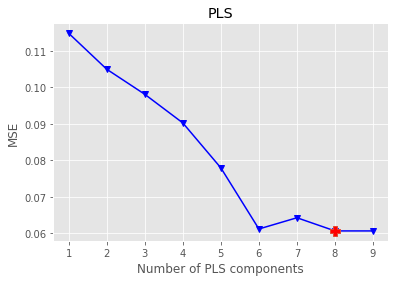

In [ ]:
plot_metrics(mses, 'MSE', 'min')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_t, y, test_size=0.33, random_state=42)
pls = PLSRegression(n_components=8)
pls.fit(X_train,y_train)
y_pred = pls.predict(X_test).round(0)
accuracy_score(y_test,y_pred)

1.0

In [79]:
pls_score = pls.x_scores_
pls_score

array([[-2.01456509e+00, -1.02038669e+00, -4.63679671e-01,
         1.34736304e+00,  1.98123746e-03, -2.35544293e-01,
        -3.96350282e-01, -1.02066252e-01],
       [-3.16812783e+00, -9.02347190e-01,  2.10737761e-01,
        -8.72811201e-01,  2.24664953e-01,  1.08895705e-01,
         3.16797527e-01,  1.26177724e-01],
       [ 4.99086159e+00, -5.76393078e-01, -1.97510853e+00,
        -5.49394043e-01, -2.21845741e-02,  1.35088887e-01,
        -2.98338434e-01,  5.33097634e-01],
       [ 1.29692271e+00,  3.53480665e+00,  5.62942654e-01,
         8.97950069e-01,  1.11773029e+00,  1.33428915e-01,
         2.11584242e-01,  1.09624862e-01],
       [ 1.62200870e+00,  1.18644833e+00,  4.16494590e-01,
        -1.53723612e+00, -5.84151412e-02, -1.02714352e+00,
        -5.47114989e-01, -3.15800698e-01],
       [-2.30864655e+00,  3.69028520e+00, -2.64383621e-01,
         5.15131578e-02, -1.92827663e+00,  7.00921511e-01,
         5.55788929e-02,  2.26379804e-02],
       [-3.16812783e+00, -9.023471

In [80]:
plt.figure(figsize=(15,16))
ax = sns.scatterplot(data=pls_score,x='PC1',y='PC2', hue = Rotate_comp['cluster_2'],
                     palette=['green','orange'])

for i in range(Rotate_comp.shape[0]):
 plt.text(x=Rotate_comp.PC1[i]+0.002,y=Rotate_comp.PC2[i]+0.002,s=Rotate_comp.Feature[i], 
          fontdict=dict(color='red',size=10))


NameError: ignored

<Figure size 1080x1152 with 0 Axes>